In [23]:
name = "Teppo Toropainen"
id = 2418377 

In [24]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [25]:
# Run if needed
!pip install numpy pandas matplotlib scipy

You should consider upgrading via the 'C:\Users\Teppo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [27]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [28]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

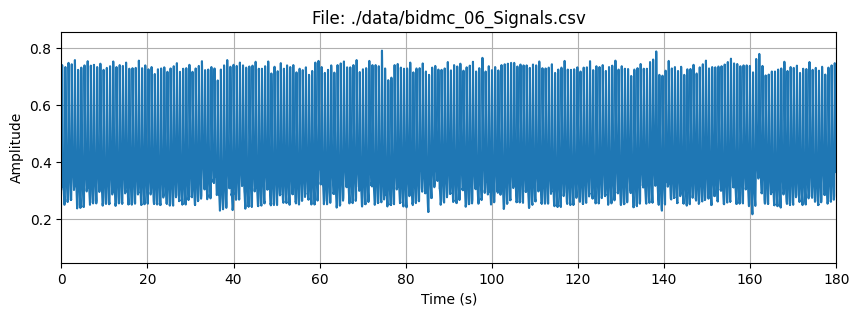

In [29]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

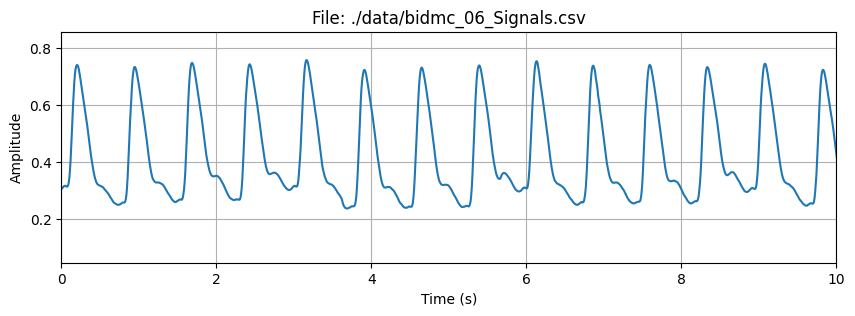

In [30]:
# Continue coding here ...
# Plot 10 seconds of the ppg signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 10) # Zoom in to the first 10 seconds
plt.grid()
plt.show()

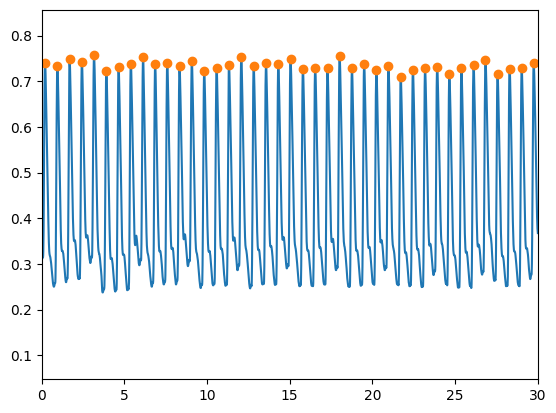

In [31]:
# Find the peaks
peaks, properties = find_peaks(ppg, height=0.5)

plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlim(0, 30)
plt.show()
# Study and change the parameters for the peak detection
# - height: minimum height of peaks (in amplitude)
# - distance: minimum distance between peaks (in samples)
# - width: width of peaks, for example width (in samples)
# - prominence: how much a peak stands out from the surrounding baseline (in amplitude)


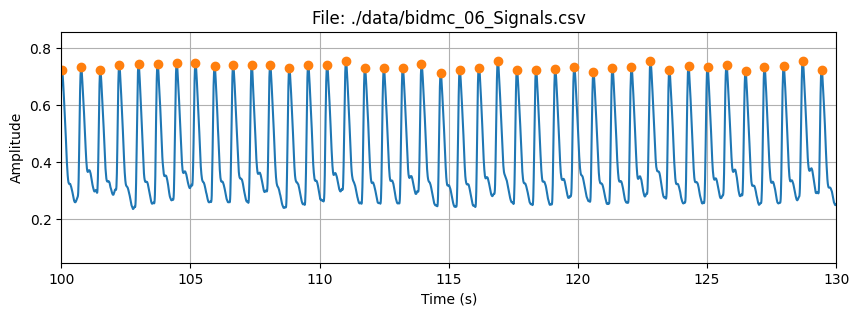

In [32]:
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130) 

plt.grid()
plt.show()

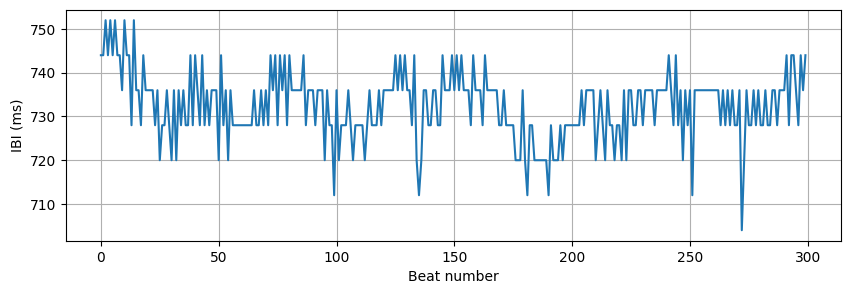

In [33]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Example: select the beats from 10 to 310. 
# Uncomment  and modify, if needed
ppi = ppi[10:310]

# Example: select the beats with IBI between 600 and 800 ms
# Uncomment and modify, if needed
i = (ppi > 500) & (ppi < 800)
ppi = ppi[i]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()

In [37]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000 / mean_ppi
print(f'Heart rate: {hr:.2f} bpm')

# Replace x with ppi
x_sqrt = np.sqrt(ppi)  # Square root
x_2 = ppi**2  # Square
x_diff = np.diff(ppi)  # Difference
x_mean = np.mean(ppi)  # Mean
x_std = np.std(ppi)  # Standard deviation
x_rmssd = np.sqrt(np.mean(np.diff(ppi)**2))  # Root mean square of successive differences

# Print the results
print(f'Original: {ppi}')
print('Square roots:', [np.round(val, 2) for val in x_sqrt])
print(f'Squares: {x_2}')
print(f'Differences: {x_diff}')
print(f'Mean: {x_mean:.2f}')
print(f'SDNN: {x_std:.2f}')
print(f'RMSSD: {x_rmssd:.2f}')

Mean IBI: 732.37 ms
Heart rate: 81.93 bpm
Original: [744. 744. 752. 744. 752. 744. 752. 744. 744. 736. 752. 744. 744. 728.
 752. 736. 736. 728. 744. 736. 736. 736. 736. 728. 736. 720. 728. 728.
 736. 728. 720. 736. 720. 736. 728. 736. 728. 728. 744. 728. 744. 736.
 728. 744. 728. 736. 728. 736. 736. 736. 720. 744. 728. 736. 720. 736.
 728. 728. 728. 728. 728. 728. 728. 728. 728. 736. 728. 728. 736. 728.
 736. 728. 744. 736. 744. 728. 744. 736. 744. 728. 744. 736. 736. 736.
 736. 736. 744. 728. 736. 736. 736. 728. 736. 736. 736. 720. 736. 728.
 728. 712. 736. 720. 728. 728. 728. 736. 728. 720. 728. 728. 728. 728.
 720. 728. 736. 728. 728. 728. 736. 728. 736. 736. 736. 736. 736. 744.
 736. 744. 736. 744. 736. 736. 728. 744. 720. 712. 720. 736. 736. 728.
 728. 736. 736. 728. 728. 744. 736. 736. 736. 744. 736. 744. 736. 744.
 736. 736. 736. 728. 744. 736. 736. 736. 728. 744. 736. 736. 736. 736.
 736. 728. 728. 736. 728. 728. 728. 728. 720. 720. 720. 736. 720. 712.
 728. 728. 720. 720. 720.

In [35]:
# Remember to add your interpretations ...
#1. Was the average heart rate low or high?
#The heart rate 81.93 bom is high compared to the standard range.

#2. Was the average ppi (peak-to-peak interval in milliseconds) low or high?
#The average ppi 732.37 is low compared to the normal range of 810-1068 ms

#3. How much variation was there in the ppi values (standard deviation and root-mean-square value of successive intervals?
#Variance is low, SDNN 7.76 ms and RMSSD 9.30 ms compared to normal range of 33-67 ms and 27-57 ms

#4. Was the variation low or high?
#The variation is low

#5. Compare these values to the given standard values (see the lecture notes) and interpret the recovery and/or stress level of the patient.
#These values might suggest that sympathetic nervous system is in dominance because of the high heart rate and low variance which means high state of stress and reduced recovery
